<a href="https://colab.research.google.com/github/mckurterson/Tampa-Real-Estate-Analysis/blob/main/Tampa_Real_Estate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Tampa_Real_Estate_2023_2025.csv')

# Convert 'SaleDate' to a proper date format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Create 'Year' and 'Month' columns for easier analysis
df['YearMonth'] = df['SaleDate'].dt.to_period('M')

print("Data loaded and prepared successfully!")
df.head()

Data loaded and prepared successfully!


,SaleDate,ZipCode,PropertyType,SalePrice,DaysOnMarket,ListingsCount,YearMonth
0,2023-01-15,33606,Single-Family,650000,35,110,2023-01
1,2023-01-20,33611,Condo,320000,45,95,2023-01
2,2023-01-25,33647,Single-Family,480000,28,150,2023-01
3,2023-04-15,33606,Single-Family,685000,30,105,2023-04
4,2023-04-20,33611,Condo,330000,40,90,2023-04


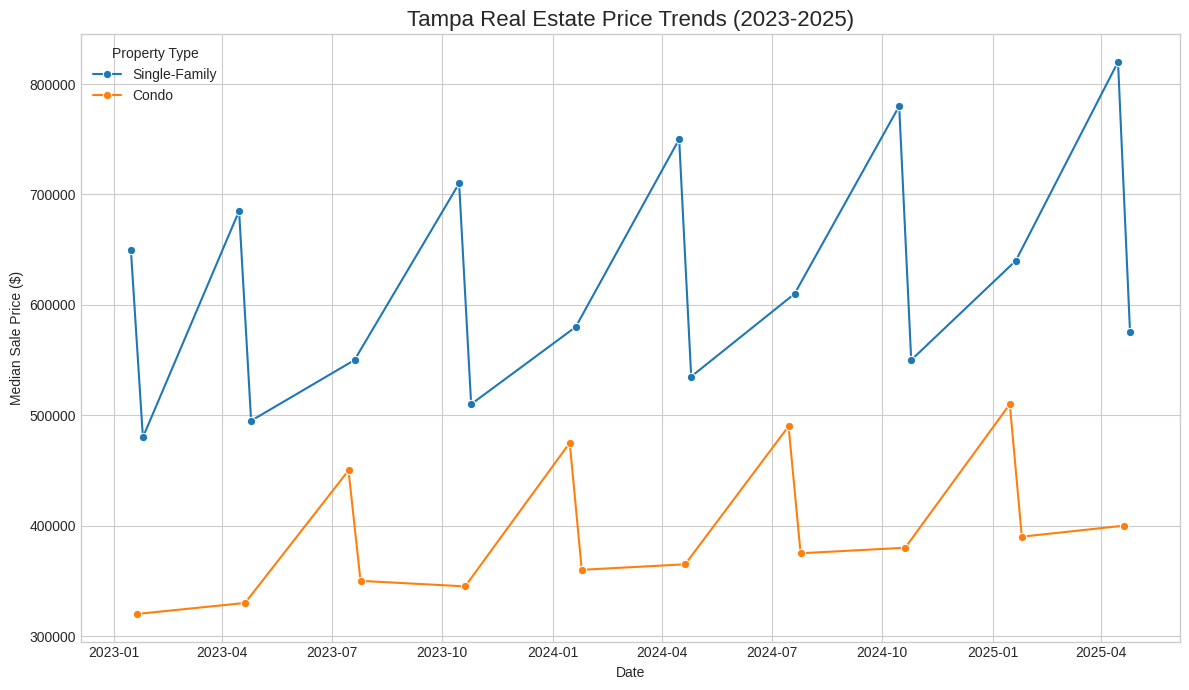

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

# Plot SalePrice over time, broken down by PropertyType
sns.lineplot(data=df, x='SaleDate', y='SalePrice', hue='PropertyType', marker='o')

plt.title('Tampa Real Estate Price Trends (2023-2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Median Sale Price ($)')
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

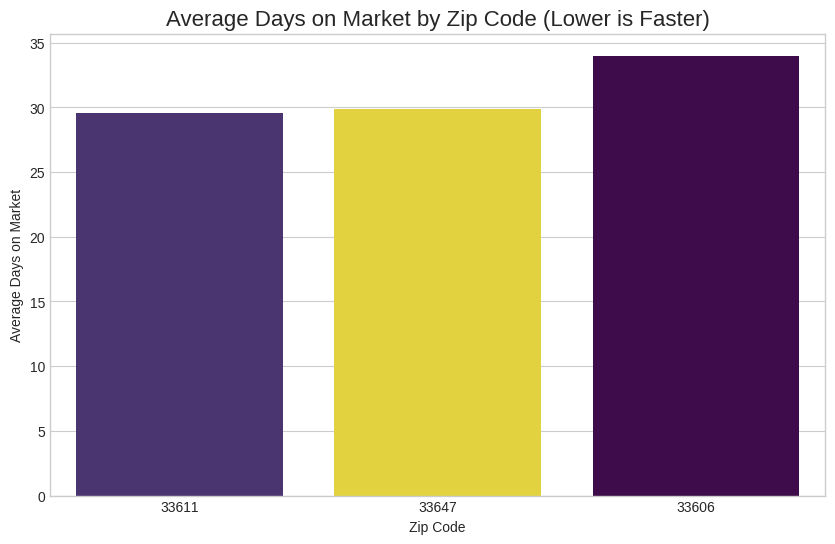

In [4]:
# Find the zip codes with the fastest-selling properties
fastest_markets = df.groupby('ZipCode')['DaysOnMarket'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=fastest_markets.index, y=fastest_markets.values, hue=fastest_markets.index, palette='viridis', order=fastest_markets.index, legend=False)

plt.title('Average Days on Market by Zip Code (Lower is Faster)', fontsize=16)
plt.xlabel('Zip Code')
plt.ylabel('Average Days on Market')
plt.show()